## Destek Vektör Makineleri (Support Vector Machine) Nedir?

Destek Vektör Makineleri genellikle sınıflandırma problemlerinde kullanılan denetimli öğrenme yöntemlerinden biridir.
Bir düzlem üzerine yerleştirilmiş noktaları ayırmak için bir doğru çizer. Bu doğrunun, iki sınıfının noktaları için de maksimum uzaklıkta olmasını amaçlar. Karmaşık ama küçük ve orta ölçekteki veri setleri için uygundur.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/destek_vektor_makineleri/destek_vektor_makinesi_foto.png?raw=true" width="750">

- Destek Vektörleri (Support Vector) : Bir sınıftan (gruplara ait elemanlardan) hiper düzeleme en yakın olan farklı veri grubu noktaları olarak ifadelendirilmektedir.

- Hiper Düzlem (Hyper Plane) : Bir sınıfa ait iki veri grubunu (en az) birbirinden ayıran düzlem olarak ifadelendirilmektedir.

- Marjin (Margin) : En yakın gruba ait veri noktası ve hiper düzlem arasındaki mesafeleri en üst düzeye çıkarmak için doğru hiper düzlemi belirlememize yardımcı olan mesafe olarak ifadelendirilmektedir.

#### Hard Margin vs Soft Margin
Marginimiz her zaman bu şekilde olmayabilir. Bazen örneklerimiz Margin bölgesine girebilir. Buna Soft Margin denir. Hard Margin, verimiz doğrusal olarak ayrılabiliyorsa çalışır ve aykırı değerlere karşı çok duyarlıdır. Bu yüzden bazı durumlarda Soft Margin’i tercih etmemiz gerekebilir.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/destek_vektor_makineleri/svm-hard-soft.png?raw=true" width="750">

#### Kernel Trick
Düşük boyutlar karmaşık veri setlerini açıklamada yeterli olmayabilir. Boyutu arttırsak işlemler artacağı için çok uzun sürer. Burada Kernel Trick  devreye giriyor. Elimizdeki koordinatları belirli Kernel Fonksiyonları ile çarparak çok daha anlamlı hale getirilebilir.

- Polynomial Kernel:
Bu yöntemde problemimizi çözmek için 2 boyuttan çıkıp 3 veya daha fazlası boyutta işlem yapıyormuş gibi hareket edilir.

<img src="https://github.com/azsaritas/makine_ogrenmesi/blob/main/dosyalar/destek_vektor_makineleri/svm_kernel.png?raw=true
" width="750">


2 boyutlu dağılımı bir doğru ile sınıflandırılamaz. Bunun için bu gibi problemlerde Polynomial Kernel kullanılabilir. 3. boyutta işlem yaparken sınıflara ayırmak için doğru yerine bir düzlem kullanılır ve çok daha düzgün bir şekilde sınıflandırılabilir.

## Destek Vektör Makineleri Örnek Uygulama

Bu uygulamada iris veri setindeki çiçek türlerinin sınıflandırılması yapılıyor.

In [1]:
from sklearn import datasets    
from sklearn import svm       
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

#### Gerekli kütüphaneleri ve iris veri setini import ediyoruz.

In [2]:
iris = datasets.load_iris()

#### Veri setindeki çiçeklerin çanak ve taç yaprak özellikleri görselleştiriyoruz.

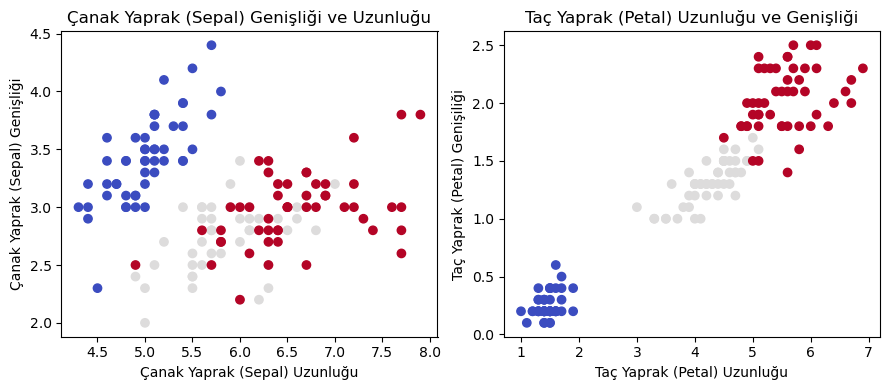

In [3]:
def visualize_sepal_and_petal_data():
    iris = datasets.load_iris()
    X_sepal = iris.data[:, :2]
    X_petal = iris.data[:, 2:]
    y = iris.target
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))

    # Sepal verisi için grafik
    ax1.scatter(X_sepal[:, 0], X_sepal[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax1.set_xlabel('Çanak Yaprak (Sepal) Uzunluğu')
    ax1.set_ylabel('Çanak Yaprak (Sepal) Genişliği')
    ax1.set_title('Çanak Yaprak (Sepal) Genişliği ve Uzunluğu')

    # Petal verisi için grafik
    ax2.scatter(X_petal[:, 0], X_petal[:, 1], c=y, cmap=plt.cm.coolwarm)
    ax2.set_xlabel('Taç Yaprak (Petal) Uzunluğu')
    ax2.set_ylabel('Taç Yaprak (Petal) Genişiliği')
    ax2.set_title('Taç Yaprak (Petal) Uzunluğu ve Genişliği')

    plt.tight_layout()  # Alt grafiklerin birbirine çakışmaması için 
    plt.show()

visualize_sepal_and_petal_data()



In [4]:
X = iris.data[:, :2]
y = iris.target

#### Çiçeğin ait olduğu sınıfın türünü tahmin etmek için Çanak Yaprak (Sepal) Uzunluk/Genişlik kullanarak bir SVM modeli oluşturuyoruz.

In [5]:
def plotSVM(title):
    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = (x_max / x_min)/100
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h))
    plt.subplot(1, 1, 1)
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlabel("Çanak Yaprak (Sepal) Uzunluğu")
    plt.ylabel("Çanak Yaprak (Sepal) Genişliği")
    plt.xlim(xx.min(), xx.max())
    plt.title(title)
    plt.show()

#### Oluşturduğumuz yapımız için Lineer ve Lineer Olmayan (polinomal) modellemeler üzerinden çekirdek (kernel) işlemleri uyguluyoruz.

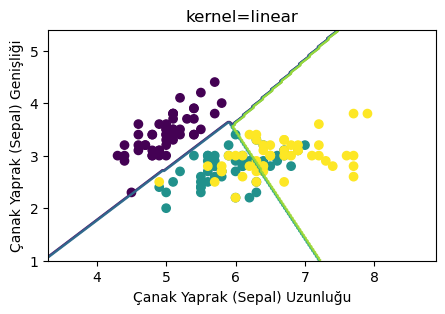

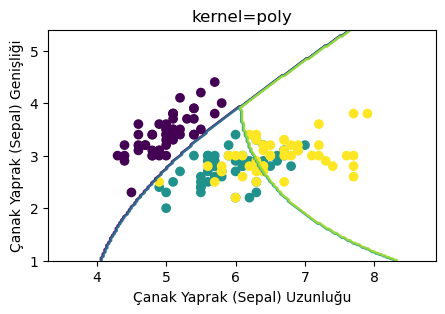

In [6]:
kernels = ["linear", "poly"]
for kernel in kernels:
    svc = svm.SVC(kernel=kernel).fit(X, y)
    plt.figure(figsize=(5, 3))
    plotSVM("kernel=" + str(kernel))

#### Farklı Gama  değerleri (0.1, 1, 10, 100) üzerinden çeşitli çekirdekleri gözlemleyerek hiperparametre ayarı oluşturuyoruz.
#### Genel olarak gama değeri arttıkça model uyumunda artış gözlemlenmektedir.

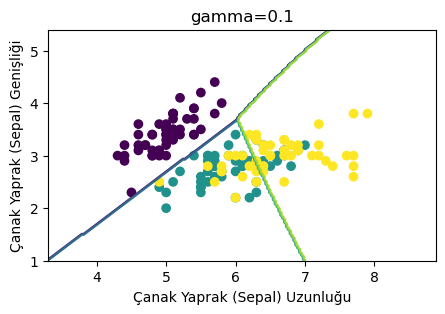

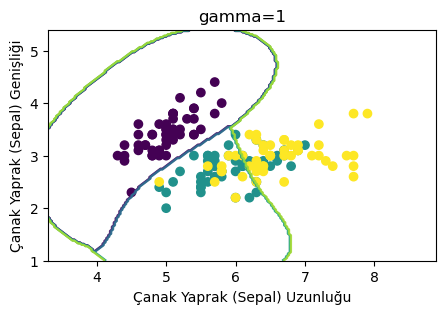

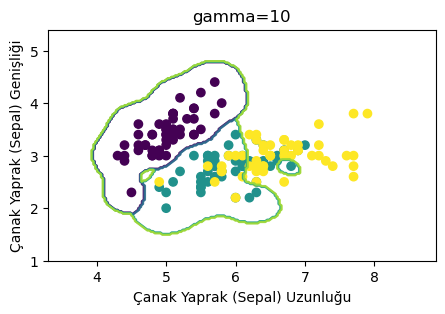

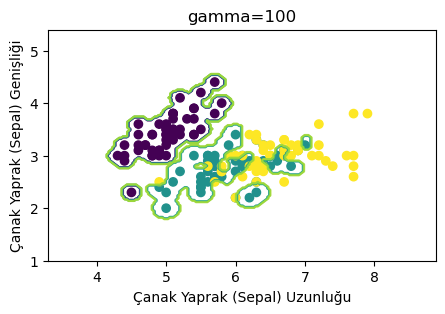

In [7]:
gammas = [0.1, 1, 10, 100]
for gamma in gammas:
    svc = svm.SVC(kernel="rbf", gamma=gamma).fit(X, y)
    plt.figure(figsize=(5, 3))
    plotSVM("gamma=" + str(gamma))

In [8]:
lin_svc = svm.SVC(kernel='linear').fit(X, y)
predictions = lin_svc.predict(iris.data[:, :2])
accuracy_score (predictions, iris.target)

0.82

#### Son olarak doğruluk değerinin hesaplıyoruz. Doğruluğumuz %82 çıktı.